<a href="https://colab.research.google.com/github/shailza969/Boston-housing-Dataset-project/blob/main/boston_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.





In [ ]:
price_df = pd.read_csv('/content/HousingData.csv')

In [ ]:
price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Preprocessing

In [ ]:
price_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
price_df['CRIM'].fillna(price_df['CRIM'].mean(), inplace= True)
price_df['ZN'].fillna(price_df['ZN'].mean(), inplace= True)
price_df['INDUS'].fillna(price_df['INDUS'].mean(), inplace= True)
price_df['CHAS'].fillna(price_df['CHAS'].mean(), inplace= True)
price_df['AGE'].fillna(price_df['AGE'].mean(), inplace= True)
price_df['LSTAT'].fillna(price_df['LSTAT'].mean(), inplace= True)
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


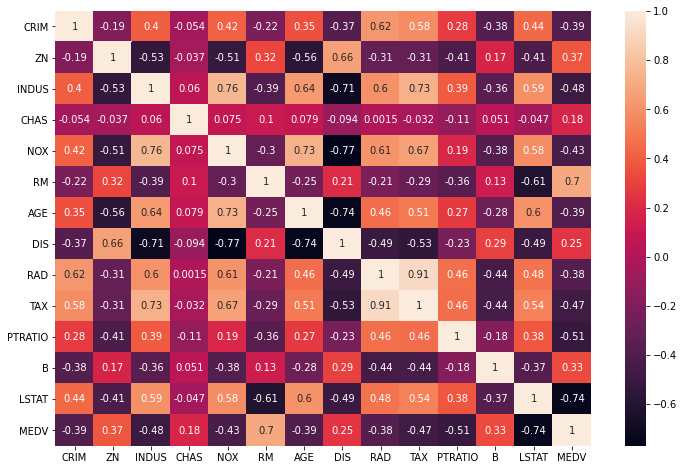

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(price_df.corr(), annot = True)

plt.show()

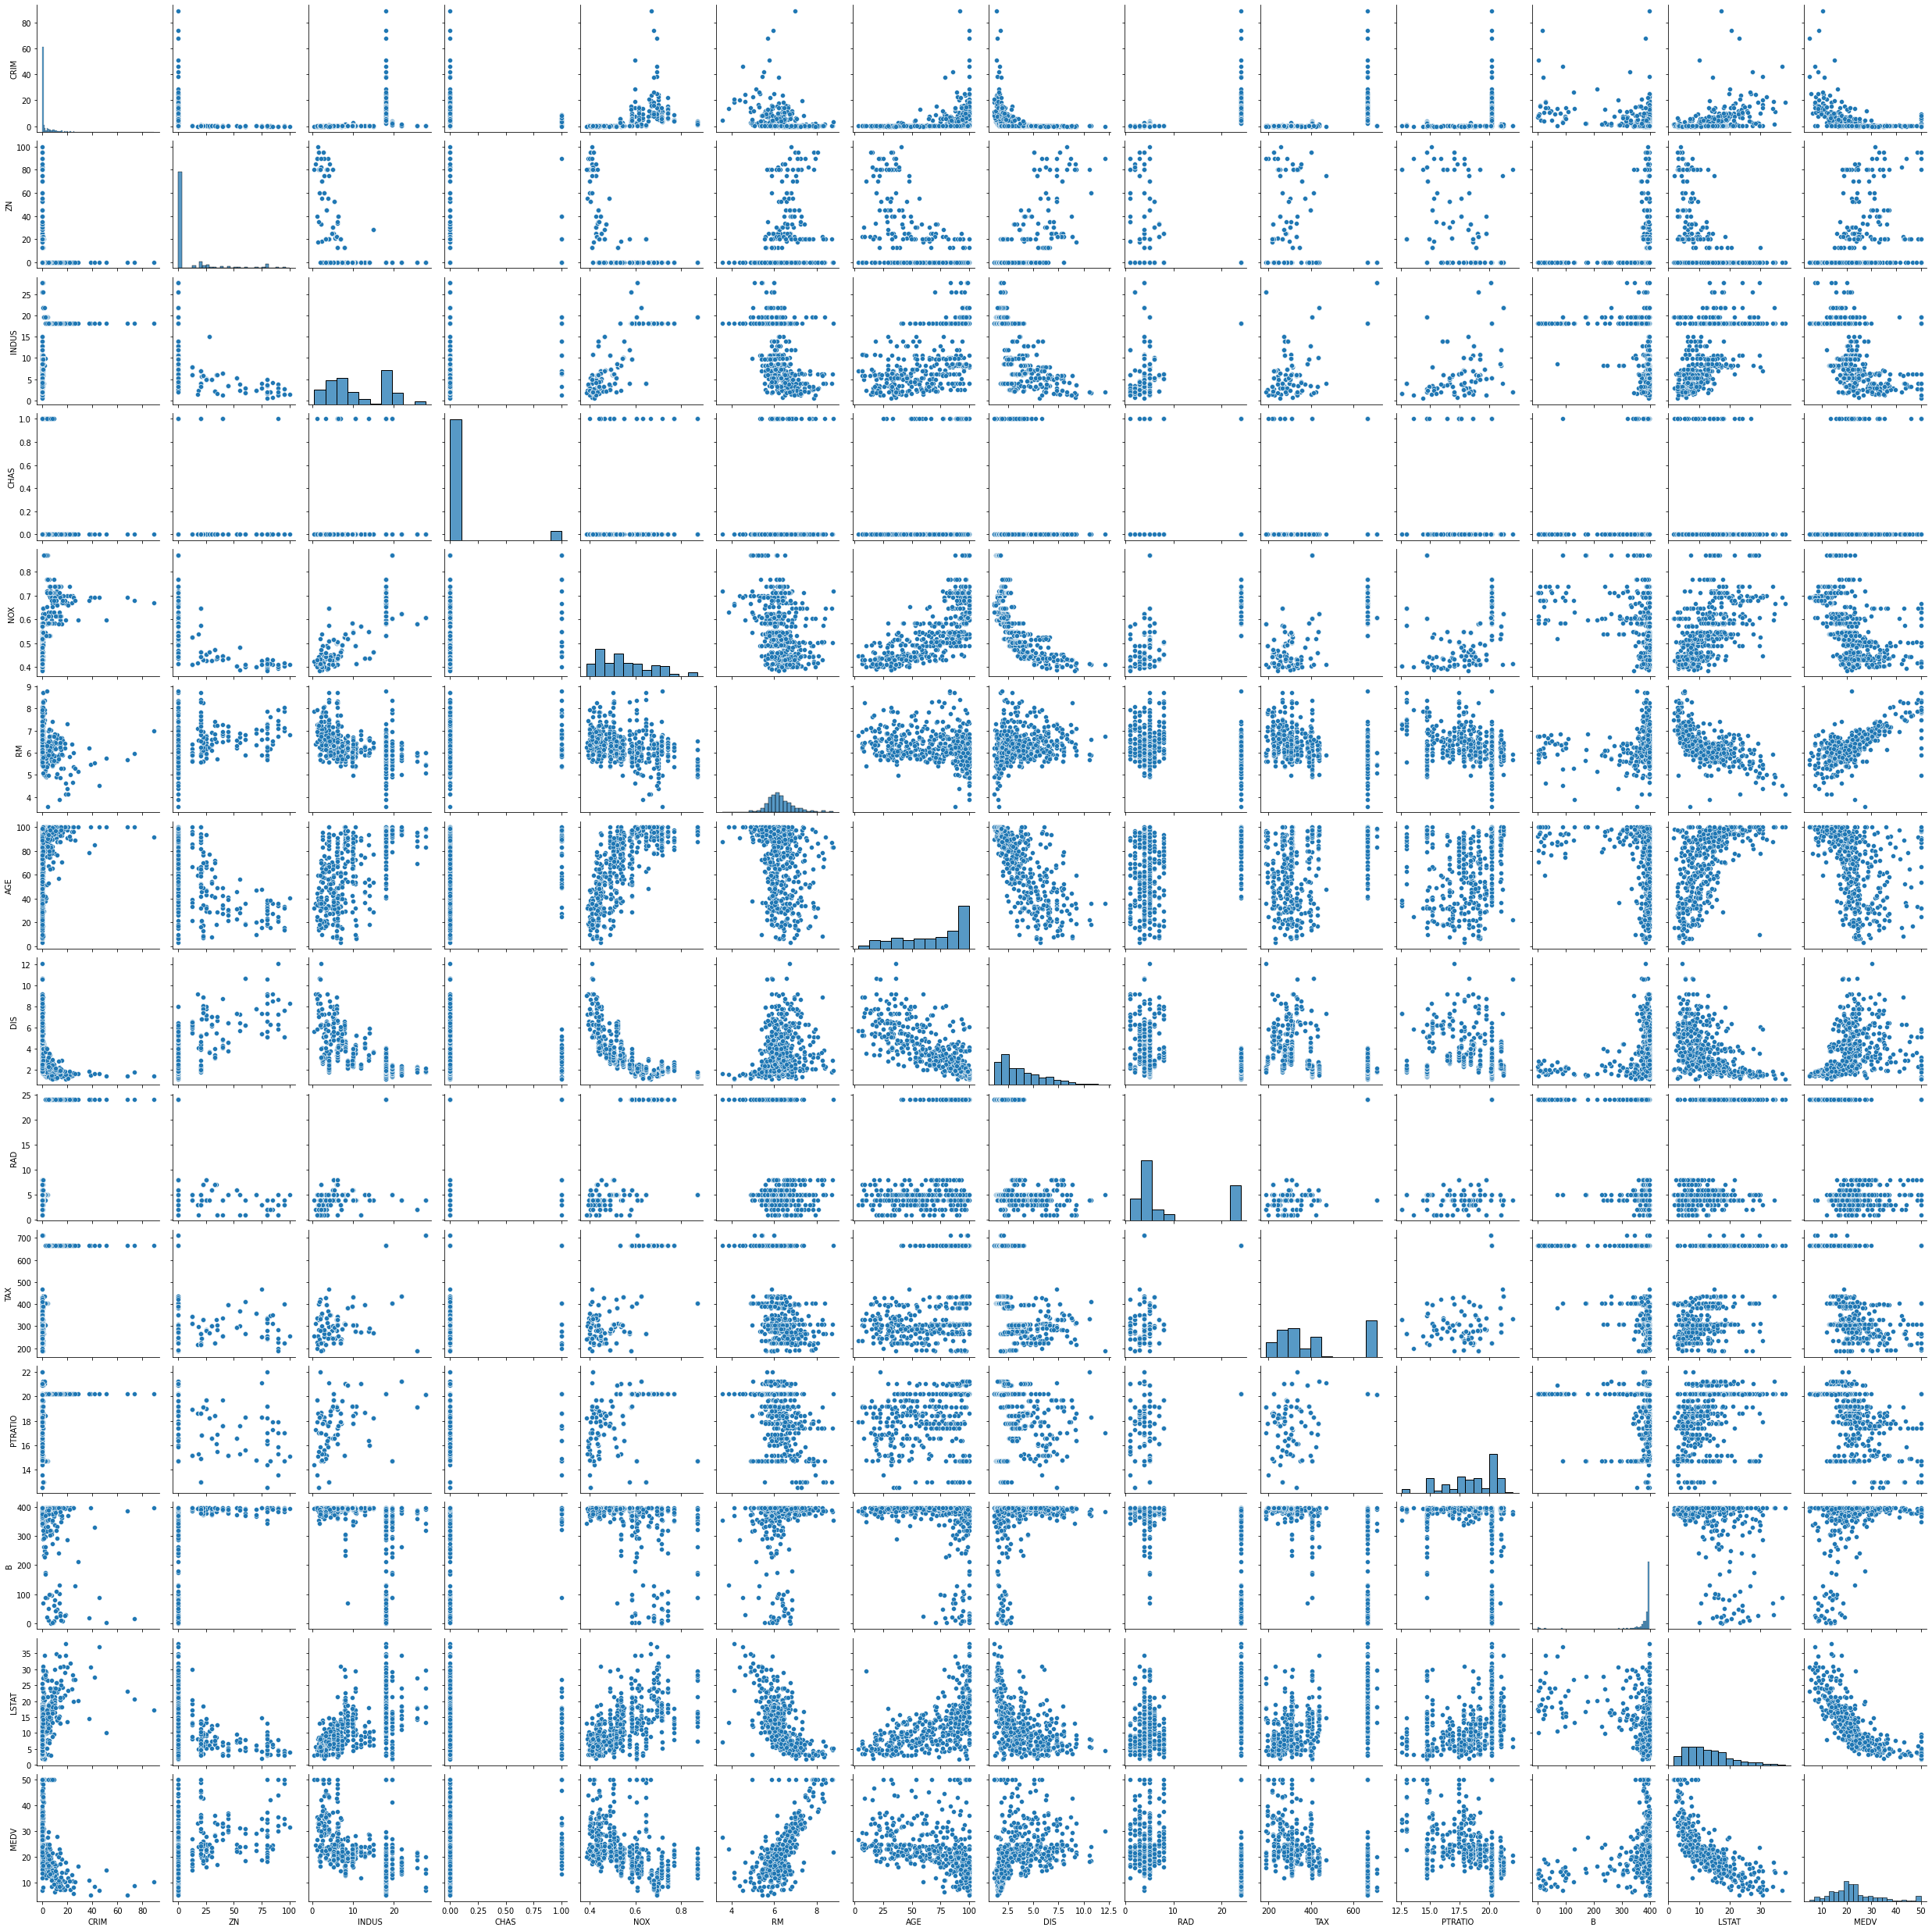

In [ ]:
sns.pairplot(price_df)
plt.show()

In [ ]:
X_train  = price_df.iloc[:, :13].values
Y_train = price_df.iloc[:, 13]

In [ ]:
X_train.shape, Y_train.shape

((506, 13), (506,))

In [ ]:
X_train[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
X_train[0:5]

array([[-4.22328461e-01,  2.96442919e-01, -1.31101039e+00,
        -2.79851323e-01, -1.44217433e-01,  4.13671889e-01,
        -1.21059300e-01,  1.40213603e-01, -9.82842857e-01,
        -6.66608209e-01, -1.45900038e+00,  4.41051933e-01,
        -1.10414593e+00],
       [-4.19869845e-01, -4.89638517e-01, -5.99770897e-01,
        -2.79851323e-01, -7.40262207e-01,  1.94274453e-01,
         3.78715644e-01,  5.57159875e-01, -8.67882504e-01,
        -9.87329485e-01, -3.03094148e-01,  4.41051933e-01,
        -5.10352718e-01],
       [-4.19872188e-01, -4.89638517e-01, -5.99770897e-01,
        -2.79851323e-01, -7.40262207e-01,  1.28271368e+00,
        -2.70626983e-01,  5.57159875e-01, -8.67882504e-01,
        -9.87329485e-01, -3.03094148e-01,  3.96426994e-01,
        -1.23974774e+00],
       [-4.19277153e-01, -4.89638517e-01, -1.33043500e+00,
        -2.79851323e-01, -8.35283838e-01,  1.01630251e+00,
        -8.28769803e-01,  1.07773662e+00, -7.52922151e-01,
        -1.10611514e+00,  1.13032096e

# Training

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
PRED = reg.predict(X_train)

## Accuracy

In [ ]:
reg.score(X_train, Y_train)

0.7314104821117173